In [1]:
from emperor import Emperor, nbinstall
from os import makedirs
from os.path import join
from skbio import OrdinationResults
import pandas as pd
import itertools
import seaborn as sns
from kmodes.kmodes import KModes
pd.options.mode.chained_assignment = None  # default='warn'
from scipy.stats import chi2_contingency
from kmodes.kmodes import KModes

# Load Data



In [2]:
data = pd.read_csv("G2_ User Interview - Final - User Interviews.csv", index_col="name")
data

interviewer  Q age age ranks  \
name                                     
Sabine            Ina     54       >40   
Jenny             Ina     30     21-30   
Britta            Ina     33     31-40   
Lisa              Ina     29     21-30   
Jaqueline         Ina     25     21-30   
Cristina    Christine     38     31-40   
Stephan     Christine     28     21-30   
Petra       Christine     59       >40   
Matic            Ziga     29     21-30   
Natalija         Ziga     29     21-30   
Primož           Ziga     29     21-30   
Nastja           Ziga     26     21-30   
Börni           Noemi     25     21-30   
Tereza          Noemi     24     21-30   
Nico            Noemi     30     21-30   
Volker            Jos     43       >40   
Theresa           Jos     43       >40   
Maria             Jos     48       >40   
Sofia          Pietro     22     21-30   
Emma           Pietro     21     21-30   
Lorenzo        Pietro     23     21-30   
Rocco          Pietro     24     21-30   

                    Q background: work / study, relationship  \
name                                                           
Sabine                 Draftswers, Industrial clerk\nmarried   
Jenny       Graphic Designer, Freelancer,\nin a relationship   
Britta     studied Interior Architecture, Design & Produk...   
Lisa       Master, working as Retail Marketing Manager\ni...   
Jaqueline  Master Restaurierung / Konservierung für Papie...   
Cristina   studied history\nProduct manager in payment in...   
Stephan    studied political science, history, currently ...   
Petra                grammar school teacher\nmarried, 3 kids   
Matic                                            Law, Single   
Natalija                            Artist, Married (Primož)   
Primož                         Architect, Married (Natalija)   
Nastja     English studies and philosophy\nWorks at an in...   
Börni           Working - Teamlead in despatching department   
Tereza               Workin within international business \n   
Nico                          Working  - Mechanical engineer   
Volker                                  buisnes unit manager   
Theresa                                              dentist   
Maria                            CEO charitable organisation   
Sofia                          studying in a dance programme   
Emma              Studying graphics and prints making (art)    
Lorenzo                           Studying Cultural Heritage   
Rocco      Master Strategy Entrepreneurship / Intern at B...   

                                   Q place of living place of living  \
name                                                                   
Sabine                             Bad Bentheim, GER          abroad   
Jenny             from Salzburg, lives in Vienna, AT    Vienna based   
Britta        from Niederrhein, lives in Bayern, GER          abroad   
Lisa       from Bad Bentheim, living in Hamburg, GER          abroad   
Jaqueline         from Salzburg, lives in Vienna, AT    Vienna based   
Cristina    Romanian, living in Vienna for 10+ years    Vienna based   
Stephan                   Austrian, living in Vienna    Vienna based   
Petra                     Austrian, living in Vienna    Vienna based   
Matic                                       Slovenia          abroad   
Natalija                                      London          abroad   
Primož                                        London          abroad   
Nastja                                        Vienna    Vienna based   
Börni                                         Vienna    Vienna based   
Tereza                                      Scotland          abroad   
Nico                                        Scotland          abroad   
Volker                                 Upper Austria  outside Vienna   
Theresa                                Upper Austria  outside Vienna   
Maria                                         Vienna    Vienna based   
Sofia                   

In [3]:
tags = data.drop([c for c in data.columns if c.startswith("Q") or c.startswith("Unnamed") or c == "vistits ranks" or c == "Persona"] , axis=1)
tags.columns

Index(['interviewer', 'age ranks', 'place of living', 'online shopping',
       'why online shopping', 'display size', 'display - motives',
       'visits museum', 'motives for museum visit',
       'motivation for museum visit', 'vistits per year', 'kind of interrest',
       'popularity', 'company', 'motives for company', 'information mode',
       'information type', 'information challenges', 'would use app',
       'ticket purchase', 'ticket purchase - motivation', 'uses app website',
       'app used now', 'apps - bad experinces', 'inform in advance',
       'suggestions'],
      dtype='object')

In [4]:
def clean(x):
    if type(x) == list:
        return x[0]

    if pd.isna(x):
        return ""

    if pd.api.types.is_numeric_dtype(x):
        return x

    l = x.split(",")
    l = [i.strip() for i in l]
    l = sorted(l)
    s = ", ".join(l)
    return s.lower()

for column in tags:
    if pd.api.types.is_string_dtype(tags[column]):
        tags[column] = tags[column].apply(clean)

# Pairwise correlations of tag categories

The heatmap shows the p-values of chi-squared test for the contingency tables of all pairwise combinations.

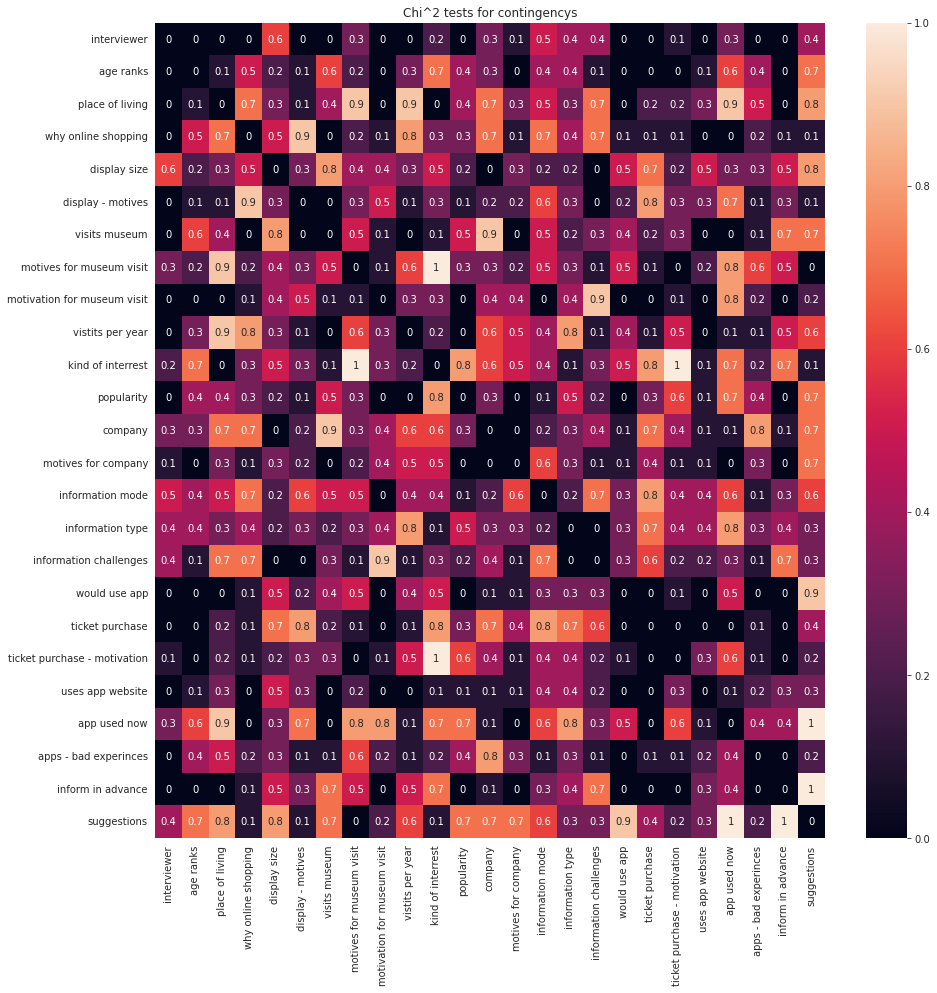

In [5]:
tags = tags.drop(columns=["online shopping"])

combinations = itertools.combinations(list(tags.columns), 2)
correlations = pd.DataFrame(0, index=tags.columns, columns=tags.columns)

for i, j in combinations:
    cont = pd.crosstab(tags[i], tags[j])
    try:
        correlations[i][j] = round(chi2_contingency(cont)[1],1)
        correlations[j][i] = round(chi2_contingency(cont)[1],1)

    except ValueError:
        correlations[i][j] = 0


from matplotlib import rcParams

rcParams['figure.figsize'] = 15,15


plot = sns.heatmap(correlations, annot=True).set_title("Chi^2 tests for contingencys")
fig = plot.get_figure()
fig.savefig("chi2_heatmap.png")

In [6]:
tags = tags.drop(columns=["interviewer"])

# K Modes

A clustering Algorithm for categorical Data.

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 281.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, it

/home/josmos/.local/share/virtualenvs/cleanclinspire-GyWQaIpZ/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


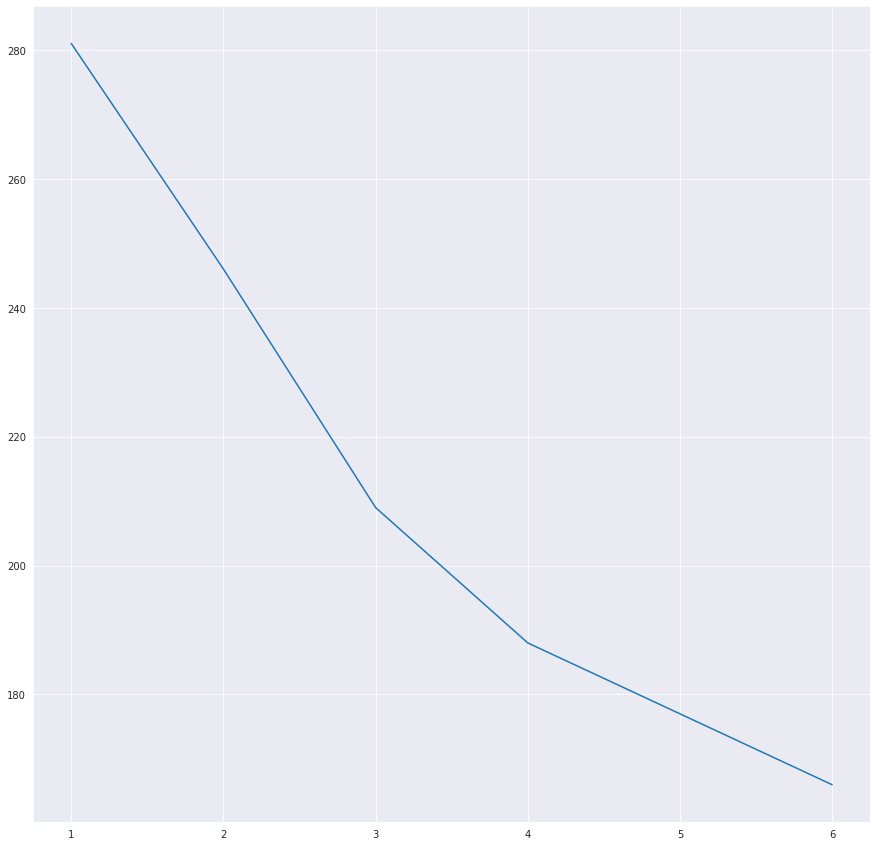

In [7]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 7, verbose=1)
    kmode.fit_predict(tags)
    cost.append(kmode.cost_)

plt = sns.lineplot(K, cost)

The Elbow cure allows to identify the ideal number of clusters

In [8]:
# Building the model with 3 clusters
tags_clustered = tags.copy(deep=True)
kmode = KModes(n_clusters=4, init = "random", n_init = 7, verbose=1)
clusters = kmode.fit_predict(tags)
tags_clustered["cluster"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 226.0
Run 3, iteration: 2/100, moves: 1, cost: 217.0
Run 3, iteration: 3/100, moves: 2, cost: 216.0
Run 3, iteration: 4/100, moves: 0, cost: 216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 3, cost: 204.0
Run 6, iteration: 2/100, moves: 1, cost: 203.0
Run 6, iteration: 3/100, moves: 0, cost: 203.0
Ini

In [9]:
tags_clustered["cluster"]

name
Sabine       2
Jenny        2
Britta       1
Lisa         1
Jaqueline    2
Cristina     1
Stephan      0
Petra        0
Matic        3
Natalija     3
Primož       3
Nastja       3
Börni        2
Tereza       2
Nico         1
Volker       0
Theresa      0
Maria        0
Sofia        1
Emma         1
Lorenzo      1
Rocco        2
Name: cluster, dtype: uint16

# Multiple Correspondence Analysis (MCA)

A visualization method for (dis)similarities multivariate categorical datasets.

https://en.wikipedia.org/wiki/Multiple_correspondence_analysis

In [10]:
import prince
mca = prince.MCA(
    n_components=22,
    n_iter=7,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )
mca = mca.fit(tags_clustered)
mca.row_coordinates(tags_clustered).index = tags_clustered.index

AttributeError: Can only use .str accessor with string values!

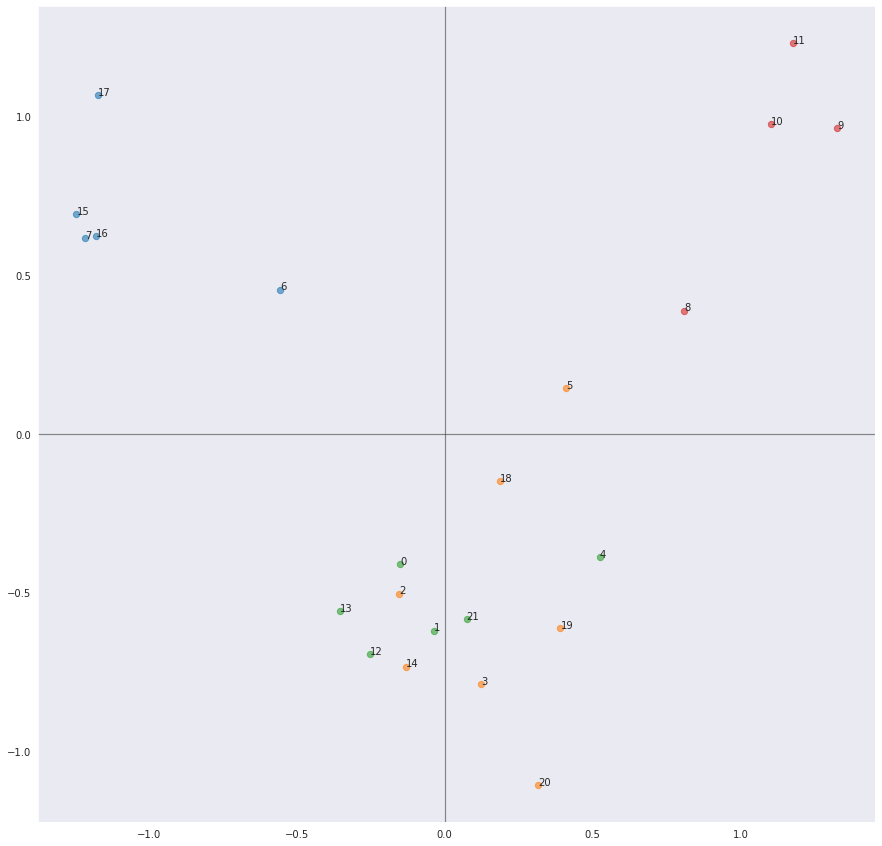

In [11]:
ax = mca.plot_coordinates(
    X=tags_clustered,
    ax=None,
    figsize=(15, 15),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size=40,
    show_row_labels=True,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1,
    row_groups=list(tags_clustered["cluster"])
    )
ax.get_figure().savefig('mca_coordinates.svg')

This plot shows the first and second principal component of the MCA. colours show the clusters assigned by the KModes algorithm.
(Error is a bug in the library -- no worries)

In [ ]:

tags_clustered


In [12]:
coords = mca.row_coordinates(tags_clustered)
coords.columns = [col +1 for col in coords.columns]
coords.index = tags_clustered.index

In [13]:
coords.to_csv("coords.tsv", sep="\t")

In [14]:
with open("ord.tsv", "w") as fh:
    samples = len(mca.eigenvalues_)
    fh.write(f"Eigvals\t{samples}\n")
    fh.write("\t".join([str(e) for e in mca.eigenvalues_]) + "\n\n")
    fh.write(f"Proportion explained\t{samples}\n")
    fh.write("\t".join([str(e) for e in mca.explained_inertia_]) + "\n\n")
    fh.write("Species\t0\t0\n\n")
    fh.write(f"Site\t{samples}\t{samples}")
    fh.write("\n")
    with open("coords.tsv", "r") as co:
        co.readline()
        cont = co.read()
        fh.write(cont)
    fh.write("\nBiplot\t0\t0\n\nSite constraints\t0\t0")

# 3 Dimensional Visualization and Feature Exploration with Emperor

This tool utilizes Principal Coordinate Analysis PCoA (a form of multidimensional scaling) for an interactive visualization of multidimensional data in three-dimensional space.

In [15]:
nbinstall()

ordination = OrdinationResults.read('ord.tsv')
output_folder = "plot"
# the remote argument refers to where the support files will be located
# relative to the plot itself i.e. index.html.
emp = Emperor(ordination, tags_clustered, remote=False)
emp

In [16]:
# create an output directory
makedirs(output_folder, exist_ok=True)

with open(join(output_folder, 'index.html'), 'w') as f:
    f.write(emp.make_emperor(standalone=True))
    emp.copy_support_files(output_folder)

In [28]:

tags_clustered["Persona"] = data["Persona"]
tags_clustered = tags_clustered.reset_index()

In [29]:
def melt_with_target(df, col1, col2):
    rows = {}
    for i, row in df.iterrows():
#        source = col1 + " - " + str(row[col1])
#        target = col2 + " - " + str(row[col2])
        source = str(row[col1])
        target = str(row[col2])
        try:
            rows[(source, target, f"cluster {row['cluster'] + 1}")] += 1
        except KeyError:
            rows[(source, target, f"cluster {row['cluster'] + 1}")] = 1

    print(rows)


    rows = [(key[0], key[1], key[2], val) for key, val in rows.items()]
    return pd.DataFrame(rows, columns=["source", "target", "type", "value"])

In [30]:

tags_flow = melt_with_target(tags_clustered, "name", "cluster")
tags_flow = pd.concat([tags_flow, melt_with_target(tags_clustered, "cluster", "Persona")])

{('Sabine', '2', 'cluster 3'): 1, ('Jenny', '2', 'cluster 3'): 1, ('Britta', '1', 'cluster 2'): 1, ('Lisa', '1', 'cluster 2'): 1, ('Jaqueline', '2', 'cluster 3'): 1, ('Cristina', '1', 'cluster 2'): 1, ('Stephan', '0', 'cluster 1'): 1, ('Petra', '0', 'cluster 1'): 1, ('Matic', '3', 'cluster 4'): 1, ('Natalija', '3', 'cluster 4'): 1, ('Primož', '3', 'cluster 4'): 1, ('Nastja', '3', 'cluster 4'): 1, ('Börni', '2', 'cluster 3'): 1, ('Tereza', '2', 'cluster 3'): 1, ('Nico', '1', 'cluster 2'): 1, ('Volker', '0', 'cluster 1'): 1, ('Theresa', '0', 'cluster 1'): 1, ('Maria', '0', 'cluster 1'): 1, ('Sofia', '1', 'cluster 2'): 1, ('Emma', '1', 'cluster 2'): 1, ('Lorenzo', '1', 'cluster 2'): 1, ('Rocco', '2', 'cluster 3'): 1}
{('2', 'nan', 'cluster 3'): 6, ('1', 'nan', 'cluster 2'): 7, ('0', 'nan', 'cluster 1'): 5, ('3', 'nan', 'cluster 4'): 4}


In [27]:
source = "Persona"
for col in tags.columns:
    if col == "cluster":
        continue
    target = col
    tags_flow = pd.concat([tags_flow, melt_with_target(tags_clustered, source, target)])
    source = target


{('nan', '>40', 'cluster 3'): 1, ('nan', '21-30', 'cluster 3'): 5, ('nan', '31-40', 'cluster 2'): 2, ('nan', '21-30', 'cluster 2'): 5, ('nan', '21-30', 'cluster 1'): 1, ('nan', '>40', 'cluster 1'): 4, ('nan', '21-30', 'cluster 4'): 4}
{('>40', 'abroad', 'cluster 3'): 1, ('21-30', 'vienna based', 'cluster 3'): 4, ('31-40', 'abroad', 'cluster 2'): 1, ('21-30', 'abroad', 'cluster 2'): 3, ('31-40', 'vienna based', 'cluster 2'): 1, ('21-30', 'vienna based', 'cluster 1'): 1, ('>40', 'vienna based', 'cluster 1'): 2, ('21-30', 'abroad', 'cluster 4'): 3, ('21-30', 'vienna based', 'cluster 4'): 1, ('21-30', 'abroad', 'cluster 3'): 1, ('>40', 'outside vienna', 'cluster 1'): 2, ('21-30', 'vienna based', 'cluster 2'): 2}
{('abroad', 'convenience', 'cluster 3'): 2, ('vienna based', 'convenience', 'cluster 3'): 3, ('abroad', '', 'cluster 2'): 2, ('vienna based', '', 'cluster 2'): 1, ('vienna based', '', 'cluster 1'): 2, ('vienna based', 'convenience, time', 'cluster 1'): 1, ('abroad', 'convenience, o

In [23]:
import ipysankeywidget


ipysankeywidget.SankeyWidget(links=tags_flow.to_dict('records'))

SankeyWidget(links=[{'source': 'Sabine', 'target': '3', 'type': 'cluster 4', 'value': 1}, {'source': 'Jenny', …